# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:
* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dog_images`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home directory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [1]:
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("data/lfw/*/*"))
dog_files = np.array(glob("data/dogImages/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `data/haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 1


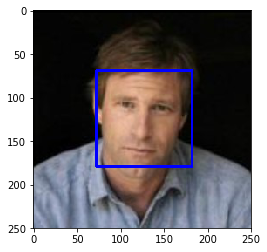

In [29]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[0])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [22]:
# returns "True" if face is detected in image stored at img_path
import cv2                
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 

* Performance of the Haar cascade classifier on the images in human_files_short is 96% (expected: 100%).
* Performance of the Haar cascade classifier on the images in dog_files_short is 17% (expected: 0%).

I also tested other classifiers available from opencv, but all of them are either worse in terms of false positives (all other Haar classifiers and Local Binary Patterns classifier) or worse in terms of false negatives (improved version of Local Binary Patterns classifier). Thus the above regular Haar cascade classifier seems to be the best choice.

In [8]:
from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#

def assess_detector_performance(images, detector_fcn):
    """
    Given an iterable of images returns the percentage of image in which a face was detected. 
    """
    count = 0
    for image in tqdm(images):
        count += detector_fcn(image)  # using the fact that boolean is equivalent to an int in Python
    return count / len(images) * 100

def print_detector_performance(detector, actual, expected, dataset_name):
    """
    Given a performance percentage (float) and a dataset name the function prints the message with these 
    data to the standard output. 
    """
    print(f'Performance of the {detector} on the images in {dataset_name} is {actual:.0f}% '\
          f'(expected: {expected:.0f}%).')

In [9]:
detector = 'Haar cascade classifier'
detector_fcn = face_detector
print_detector_performance(detector, assess_detector_performance(human_files_short, detector_fcn), 100, 'human_files_short')
print_detector_performance(detector, assess_detector_performance(dog_files_short, detector_fcn), 0, 'dog_files_short')

100%|████████████████████████████████████████| 100/100 [00:03<00:00, 29.96it/s]


Performance of the Haar cascade classifier on the images in human_files_short is 96% (expected: 100%).


100%|████████████████████████████████████████| 100/100 [00:15<00:00,  8.79it/s]


Performance of the Haar cascade classifier on the images in dog_files_short is 17% (expected: 0%).


We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [10]:
"""
The code below would run if we had proper data
"""

from os import path
detectors = {
    'Haar cascade classifier, alt2,': path.join('data', 'haarcascades', 'haarcascade_frontalface_alt2.xml'),
    'Haar cascade classifier - cuda': path.join('data', 'haarcascades_cuda', 'haarcascade_frontalface_alt.xml'),
    'Haar cascade classifier - cuda, alt2,': path.join('data', 'haarcascades_cuda', 'haarcascade_frontalface_alt2.xml'),
    'Local Binary Patterns cascade classifier': path.join('data', 'lbpcascades', 'lbpcascade_frontalface.xml'),
    'Local Binary Patterns cascade classifier, improved,': path.join('data', 'lbpcascades', 'lbpcascade_frontalface_improved.xml')
}

for detector, file_path in detectors.items():
    face_cascade = cv2.CascadeClassifier(file_path)
    print_detector_performance(detector, assess_detector_performance(human_files_short, detector_fcn), 100, 'human_files_short')
    print_detector_performance(detector, assess_detector_performance(dog_files_short, detector_fcn), 0, 'dog_files_short')


100%|████████████████████████████████████████| 100/100 [00:03<00:00, 30.89it/s]


Performance of the Haar cascade classifier, alt2, on the images in human_files_short is 99% (expected: 100%).


100%|████████████████████████████████████████| 100/100 [00:15<00:00,  8.74it/s]


Performance of the Haar cascade classifier, alt2, on the images in dog_files_short is 23% (expected: 0%).


100%|████████████████████████████████████████| 100/100 [00:03<00:00, 23.98it/s]


Performance of the Haar cascade classifier - cuda on the images in human_files_short is 98% (expected: 100%).


100%|████████████████████████████████████████| 100/100 [00:16<00:00,  6.02it/s]


Performance of the Haar cascade classifier - cuda on the images in dog_files_short is 24% (expected: 0%).


100%|████████████████████████████████████████| 100/100 [00:04<00:00, 22.41it/s]


Performance of the Haar cascade classifier - cuda, alt2, on the images in human_files_short is 98% (expected: 100%).


100%|████████████████████████████████████████| 100/100 [00:20<00:00,  7.45it/s]


Performance of the Haar cascade classifier - cuda, alt2, on the images in dog_files_short is 37% (expected: 0%).


100%|████████████████████████████████████████| 100/100 [00:02<00:00, 39.73it/s]


Performance of the Local Binary Patterns cascade classifier on the images in human_files_short is 93% (expected: 100%).


100%|████████████████████████████████████████| 100/100 [00:07<00:00, 14.06it/s]


Performance of the Local Binary Patterns cascade classifier on the images in dog_files_short is 34% (expected: 0%).


100%|████████████████████████████████████████| 100/100 [00:01<00:00, 56.71it/s]


Performance of the Local Binary Patterns cascade classifier, improved, on the images in human_files_short is 84% (expected: 100%).


100%|████████████████████████████████████████| 100/100 [00:06<00:00, 18.04it/s]


Performance of the Local Binary Patterns cascade classifier, improved, on the images in dog_files_short is 5% (expected: 0%).


---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [2]:
import torch

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    device = torch.device("cuda")
else:
    device = torch.device("cpu")

In [23]:
import torchvision.models as models
# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

if use_cuda:
    VGG16 = VGG16.cuda()

Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [24]:
from PIL import Image
import torchvision.transforms as transforms
from matplotlib import pyplot as plt
%matplotlib inline 

for param in VGG16.parameters(): 
    param.requires_grad_(False)

def VGG16_predict(img_path, display=False):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    # read the image
    image = Image.open(img_path).convert('RGB')
    # and display if wanted
    if display:
        plt.imshow(image)
        plt.show()
    # transform the image to VGG representation
    image_transforms = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])
    image = image_transforms(image)[:3,:,:].unsqueeze(0).to(device)
    
    # construct a model variable 
    input_var = torch.autograd.Variable(image, requires_grad=False)
    
    # change to eval mode
    VGG16.eval()
    # evaluate
    output = VGG16(input_var)
    # get maximum
    maxval, idx = output.max(1)
    # return the index at which the maximum was attained
    return idx.item() 

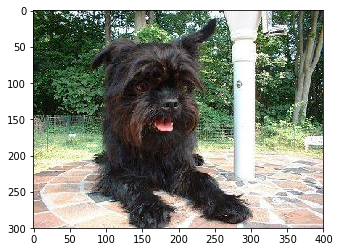

Class: 252
ImageNet defines it as "affenpinscher, monkey pinscher, monkey dog"


In [25]:
import os
img_path = os.path.join('data','dogImages','train','001.Affenpinscher','Affenpinscher_00001.jpg')
output = VGG16_predict(img_path, True)
print(f'Class: {output}')
if output == 252:
    print('ImageNet defines it as "affenpinscher, monkey pinscher, monkey dog"')

### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [26]:
### returns "True" if a dog is detected in the image stored at img_path
def vgg_dog_detector(img_path, display=False):
    dog_min_class = 151
    dog_max_class = 268
    output = VGG16_predict(img_path, display)
    return dog_min_class <= output <= dog_max_class

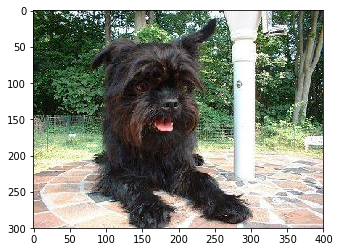

It is a dog


In [27]:
is_dog = vgg_dog_detector(img_path, True)
print('It is a dog' if is_dog else 'It is not a dog')

### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__ 

* Performance of the VGG-16 on the images in human_files_short is 0% (expected: 0%).
* Performance of the VGG-16 on the images in dog_files_short is 94% (expected: 100%).

In [17]:
detector_fcn = dog_detector
detector = 'VGG-16'
print_detector_performance(detector, assess_detector_performance(human_files_short, detector_fcn), 0, 'human_files_short')
print_detector_performance(detector, assess_detector_performance(dog_files_short, detector_fcn), 100, 'dog_files_short')

100%|████████████████████████████████████████| 100/100 [00:06<00:00, 14.88it/s]


Performance of the VGG-16 on the images in human_files_short is 0% (expected: 0%).


100%|████████████████████████████████████████| 100/100 [00:07<00:00, 13.45it/s]


Performance of the VGG-16 on the images in dog_files_short is 94% (expected: 100%).


We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [ ]:
### (Optional) 
### TODO: Report the performance of another pre-trained network.
### Feel free to use as many code cells as needed.

---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dog_images/train`, `dog_images/valid`, and `dog_images/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [3]:
dog_classes = 133

In [4]:
import torch
import numpy as np
import os
from torchvision import datasets
import torchvision.transforms as transforms
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

dog_images_dir = os.path.join('data', 'dogImages')
train_dir = os.path.join(dog_images_dir, 'train')
valid_dir = os.path.join(dog_images_dir, 'valid')
test_dir = os.path.join(dog_images_dir, 'test')

batch_size = 10
num_workers = 0
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])

phases = ['train', 'valid', 'test']
def get_data_loader(directory, phase, input_size, batch_size=10, num_workers=0):
    if phase == 'train':
        image_transforms = transforms.Compose([
            transforms.RandomResizedCrop(input_size),
            transforms.RandomHorizontalFlip(0.05),
            transforms.RandomVerticalFlip(),
            transforms.RandomRotation(45),
            transforms.ToTensor(),
            normalize
        ])
        shuffle = True
    else:
        image_transforms = transforms.Compose([
            transforms.Resize(input_size),
            transforms.CenterCrop(input_size),
            transforms.ToTensor(),
            normalize,
        ])
        shuffle = False
        
    return torch.utils.data.DataLoader(
        datasets.ImageFolder(directory, image_transforms),
        batch_size=batch_size, 
        shuffle=shuffle,
        num_workers=num_workers, 
        pin_memory=True)

In [5]:
loaders_scratch = dict(train=get_data_loader(train_dir, 'train', 224), 
                       valid=get_data_loader(valid_dir, 'valid', 224), 
                       test=get_data_loader(test_dir, 'test', 224))

**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?


**Answer**:

1. I chose to first scale images so that the shorter edge is equal to the input size that a network accepts, and then crop them square. The input size of my network is 224 x 224, as for the majority of famous networks. This has a practical dimensions, since I can safely assume datasets are created with this size in mind.

2. 
  1. For the training set I added:
    * a random vertical flip, as we want a network to learn to recognise dog breeds from both sides and it is safe to assume that animals are vertically approximately symmetric,
    * a random rotation (from -45 to 45 deg) to make the network more resilient towards varying orientation of a dog with respect to a camera. 
  2. I didn't add any transformations to validation and test sets as they should be as close as possible to the actual data.

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [6]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    # conv2d_depths = [1, 2, 4, 8, 16, 32]
    conv2d_depths = [3, 16, 32, 64, 128, 128]
    linear_features = [2048, 1024, dog_classes]

    def __init__(self):
        super(Net, self).__init__()
        # convolutional layers
        self.conv1 = nn.Conv2d(self.conv2d_depths[0], self.conv2d_depths[1], 3, padding=1)  # 224
        self.conv2 = nn.Conv2d(self.conv2d_depths[1], self.conv2d_depths[2], 3, padding=1)  # 112
        self.conv3 = nn.Conv2d(self.conv2d_depths[2], self.conv2d_depths[3], 3, padding=1)  # 56
        self.conv4 = nn.Conv2d(self.conv2d_depths[3], self.conv2d_depths[4], 3, padding=1)  # 28
        self.conv5 = nn.Conv2d(self.conv2d_depths[4], self.conv2d_depths[5], 3, padding=1)  # 14
        # conv2d dropout
        self.conv2_dropout = nn.Dropout2d(0.2)
        # pooling layer
        self.pool = nn.MaxPool2d(2, 2)
        # fully connected layers
        self.in_features = self.conv2d_depths[-1] * 14 ** 2
        self.linear1 = nn.Linear(self.in_features, self.linear_features[0])
        self.linear2 = nn.Linear(self.linear_features[0], self.linear_features[1])
        self.linear3 = nn.Linear(self.linear_features[1], self.linear_features[2])
        # dropout
        self.dropout = nn.Dropout(0.2)

    def forward(self, x):
        # Define forward behavior
        x = F.relu(self.conv1(x))
        x = self.conv2_dropout(x)
        x = self.pool(x)
        x = F.relu(self.conv2(x))
        x = self.conv2_dropout(x)
        x = self.pool(x)
        x = F.relu(self.conv3(x))
        x = self.conv2_dropout(x)
        x = self.pool(x)
        x = F.relu(self.conv4(x))
        x = self.conv2_dropout(x)
        x = self.pool(x)
        x = F.relu(self.conv5(x))
        x = self.conv2_dropout(x)

        # flatten, otherwise it won't work
        x = x.view(-1, self.in_features)

        x = F.relu(self.linear1(x))
        x = self.dropout(x)
        x = F.relu(self.linear2(x))
        x = self.dropout(x)
        x = F.relu(self.linear3(x))
        x = self.dropout(x)  

        return x
    
#-#-# You so NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__ 
Since the network has to learn features in an image it has a five convolutional layers to learn these features. In the end there are 3 fully connected layers with the decreasing number of features, to map learned features to dog breed classes. This is following approaches taken in other existing architectures. The network produces 133 output classes, which is the number of dog breed classes. There is some small dropout introduced after each layer, both convolutional and fully connected types. 
Finally, since I will use CrossEntropyLoss as my criterion, I don't have to calculate (Log)Softmax by myself (as the CrossEntropyLoss) does it, so I'm just returning the outcome of the last Linear layer.

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [7]:
import torch.optim as optim

criterion_scratch = nn.CrossEntropyLoss()  
optimizer_scratch = optim.SGD(model_scratch.parameters(), lr=0.03)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [8]:
def save_model(model, save_path, epoch=-1):
    if epoch > 0:
        file_name, file_ext = os.path.splitext(save_path)
        torch.save(model.state_dict(), f'{file_name}_{epoch}{file_ext}')
    torch.save(model.state_dict(), save_path)

In [9]:
import torchvision.models as models
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True  # to alleviate OSError: image file is truncated (150 bytes not processed) problem

CUDA_LAUNCH_BLOCKING=1
def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path, from_epoch=0, valid_loss_min=np.Inf):
    """returns trained model"""
  
    for epoch in range(1, n_epochs + 1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0

        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            """ From https://pytorch.org/tutorials/beginner/finetuning_torchvision_models_tutorial.html and 
             https://discuss.pytorch.org/t/how-to-optimize-inception-model-with-auxiliary-classifiers/7958
            """
            optimizer.zero_grad()
            if isinstance(model, models.Inception3):
                output, aux_output = model(data)
                loss1 = criterion(output, target)
                loss2 = criterion(aux_output, target)
                loss = loss1 + 0.4*loss2
            else:
                output = model(data)
                loss = criterion(output, target)
                
            loss.backward()
            optimizer.step()
            train_loss += ((1 / (batch_idx + 1)) * (loss.data - train_loss))

        ######################
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            output = model.forward(data)
            loss = criterion(output, target)
            valid_loss += ((1 / (batch_idx + 1)) * (loss.data - valid_loss))

        # print training/validation statistics
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch + from_epoch,
            train_loss,
            valid_loss
        ))

        # save the model if validation loss has decreased
        if valid_loss <= valid_loss_min:
            print(f'Validation loss decreased ({valid_loss_min:.6f} --> {valid_loss:.6f}).  Saving model ...')
            try:
                save_model(model, save_path)
            except:
                print('Could not save the model')
            valid_loss_min = valid_loss

    # return trained model
    return model

In [13]:
model_scratch = train(65, loaders_scratch, model_scratch, optimizer_scratch, 
                      criterion_scratch, use_cuda, 'model_scratch_7.pt')

Epoch: 1 	Training Loss: 4.889553 	Validation Loss: 4.886048
Validation loss decreased (inf --> 4.886048).  Saving model ...
Epoch: 2 	Training Loss: 4.885120 	Validation Loss: 4.881454
Validation loss decreased (4.886048 --> 4.881454).  Saving model ...
Epoch: 3 	Training Loss: 4.882709 	Validation Loss: 4.876036
Validation loss decreased (4.881454 --> 4.876036).  Saving model ...
Epoch: 4 	Training Loss: 4.875256 	Validation Loss: 4.865445
Validation loss decreased (4.876036 --> 4.865445).  Saving model ...
Epoch: 5 	Training Loss: 4.868653 	Validation Loss: 4.863792
Validation loss decreased (4.865445 --> 4.863792).  Saving model ...
Epoch: 6 	Training Loss: 4.861197 	Validation Loss: 4.852164
Validation loss decreased (4.863792 --> 4.852164).  Saving model ...
Epoch: 7 	Training Loss: 4.851340 	Validation Loss: 4.814590
Validation loss decreased (4.852164 --> 4.814590).  Saving model ...
Epoch: 8 	Training Loss: 4.839906 	Validation Loss: 4.797177
Validation loss decreased (4.81459

In [10]:
model_scratch.load_state_dict(torch.load('model_scratch_7.pt'))

In [14]:
model_scratch = train(35, loaders_scratch, model_scratch, optimizer_scratch, 
                       criterion_scratch, use_cuda, 'model_scratch_8.pt', 65, 4.098819)

Epoch: 66 	Training Loss: 4.402485 	Validation Loss: 4.124255
Epoch: 67 	Training Loss: 4.394093 	Validation Loss: 4.087966
Validation loss decreased (4.098819 --> 4.087966).  Saving model ...
Epoch: 68 	Training Loss: 4.404896 	Validation Loss: 4.082077
Validation loss decreased (4.087966 --> 4.082077).  Saving model ...
Epoch: 69 	Training Loss: 4.392813 	Validation Loss: 4.060993
Validation loss decreased (4.082077 --> 4.060993).  Saving model ...
Epoch: 70 	Training Loss: 4.388340 	Validation Loss: 4.042797
Validation loss decreased (4.060993 --> 4.042797).  Saving model ...
Epoch: 71 	Training Loss: 4.396849 	Validation Loss: 4.076453
Epoch: 72 	Training Loss: 4.368060 	Validation Loss: 4.079786
Epoch: 73 	Training Loss: 4.378596 	Validation Loss: 4.008744
Validation loss decreased (4.042797 --> 4.008744).  Saving model ...
Epoch: 74 	Training Loss: 4.378930 	Validation Loss: 4.034268
Epoch: 75 	Training Loss: 4.370148 	Validation Loss: 4.014863
Epoch: 76 	Training Loss: 4.342208 

In [7]:
model_scratch.load_state_dict(torch.load('model_scratch_8.pt'))

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [8]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

In [10]:
# call test function    b
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 3.822538


Test Accuracy: 13% (113/836)


---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [5]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

# From https://pytorch.org/tutorials/beginner/finetuning_torchvision_models_tutorial.html#load-data: 
# "notice that inception_v3 requires the input size to be (299,299), whereas all of the other models expect (224,224)."
loaders_transfer = dict(train=get_data_loader(train_dir, 'train', 299), 
                        valid=get_data_loader(valid_dir, 'valid', 299), 
                        test=get_data_loader(test_dir, 'test', 299))

### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [7]:
import torchvision.models as models
import torch.nn as nn

model_transfer = models.inception_v3(pretrained=True)

In [8]:
def freeze_weights(model):
    for param in model.parameters():
        param.require_grad = False
    return model


def create_fc_layer(layer, n_outputs):
    n_inputs = layer.in_features
    return nn.Linear(n_inputs, n_outputs)


model_transfer = freeze_weights(model_transfer)
model_transfer.fc = create_fc_layer(model_transfer.fc, dog_classes)
model_transfer.AuxLogits.fc = create_fc_layer(model_transfer.AuxLogits.fc, dog_classes)

assert model_transfer.fc.out_features == 133, \
    f"Expected 133 classes but got {model_transfer.fc.out_features} (dog_classes = {dog_classes})"
assert model_transfer.AuxLogits.fc.out_features == 133, \
    f"Expected 133 classes in AuxLogits but got {model_transfer.AuxLogits.fc.out_features} (dog_classes = {dog_classes})"

In [9]:
use_cuda = torch.cuda.is_available()
if use_cuda:
    model_transfer = model_transfer.cuda()

__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ 
Our dataset is small (20K images), but the dataset is similar to ImageNet on which Inception (and all other Torch models) was pretrained. Thus we should change the end of the ConvNet:
1. freeze all the weights from the pretrained network,
1. slice off the end of the neural network,
2. add a new fully connected layer that matches the number of classes in the new data set,
3. randomize the weights of the new fully connected layer,
4. train the network to update the weights of the new fully connected layer.

We don't need to explicitly randomize the weights of the new fc layers, because the weights are randomized by default when a new Linear layer is created.

We need to create two fully connected layers - one for a final classifier (this is common accross all networks) and one for the auxiliary classifier that Inception v3 model uses to improve its training.

Freezing the weights in the pretrained network prevents overfitting, which otherwise would be possible since our dataset is small. The choice of Inception network is motivated by the fact that it outperformed other networks (AlexNet, VGG, etc) in ImageNet Large Scale Visual Recognition Competition 2014 in the task of classification. Moreover, as mentioned at the beginning of this notebook, ImageNet contains 118 dog breed classes, so these pretrained networks actually already know how to recognise dogs. Now it is only the matter of reassining which features correspond to each class, which is done in a final linear classificiation layer. Thus the above approach seems suitable to the problem at hand.

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [10]:
import torch.optim as optim

In [11]:
opt_SGD = 'SGD'
opt_Adam = 'Adam'
opt_RMSprop = 'RMSprop'


def get_trainable_parameters(layers):
    trainable_parameters = []
    for layer in layers:
        for param in layer.parameters():
            if param.requires_grad:
                trainable_parameters.append(param)
    return trainable_parameters

def get_optimizer(opt_class, params, lr, eps=0.1, weight_decay=0.9):
    if opt_class == opt_SGD:
        return optim.SGD(params, lr=lr)
    if opt_class == opt_Adam:
        return optim.Adam(params, lr=lr)
    if opt_class == opt_RMSprop:
        return optim.RMSprop(model_transfer.fc.parameters(), lr=lr, eps=eps, weight_decay=weight_decay)
    raise ValueError(f'Unknown optimizer {opt_class}')

In [12]:
criterion_transfer = nn.CrossEntropyLoss()

In [13]:
lr = 0.01
opt_class = opt_SGD

trainable_params = get_trainable_parameters([model_transfer.fc, model_transfer.AuxLogits.fc])
print(len(trainable_params))
optimizer_transfer = get_optimizer(opt_class, trainable_params, lr)

4


### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [ ]:
# train the model

n_epochs = 100
suffix = f'_{opt_class}_{n_epochs}_{lr}'
model_transfer = train(n_epochs, loaders_transfer, model_transfer, optimizer_transfer, 
                       criterion_transfer, use_cuda, f'model_transfer_{suffix}.pt')

# load the model that got the best validation accuracy (uncomment the line below)
model_transfer.load_state_dict(torch.load(f'model_transfer_{suffix}.pt'))

Epoch: 1 	Training Loss: 6.508760 	Validation Loss: 4.018022
Validation loss decreased (inf --> 4.018022).  Saving model ...
Epoch: 2 	Training Loss: 5.743262 	Validation Loss: 3.245620
Validation loss decreased (4.018022 --> 3.245620).  Saving model ...
Epoch: 3 	Training Loss: 5.148015 	Validation Loss: 2.635256
Validation loss decreased (3.245620 --> 2.635256).  Saving model ...
Epoch: 4 	Training Loss: 4.708520 	Validation Loss: 2.185142
Validation loss decreased (2.635256 --> 2.185142).  Saving model ...
Epoch: 5 	Training Loss: 4.389548 	Validation Loss: 1.852532
Validation loss decreased (2.185142 --> 1.852532).  Saving model ...
Epoch: 6 	Training Loss: 4.119305 	Validation Loss: 1.597064
Validation loss decreased (1.852532 --> 1.597064).  Saving model ...
Epoch: 7 	Training Loss: 3.965103 	Validation Loss: 1.423795
Validation loss decreased (1.597064 --> 1.423795).  Saving model ...
Epoch: 8 	Training Loss: 3.836318 	Validation Loss: 1.281029
Validation loss decreased (1.42379

In [16]:
model_transfer.load_state_dict(torch.load(f'model_transfer_{suffix}.pt'))

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [17]:
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

Test Loss: 0.967601


Test Accuracy: 75% (632/836)


**Note:** My model was supposed to train for 100 epochs, but the notebook crashed after 13 epochs. Since these 13 was enough to attain test accuracy of 75% I decided to not rerun the training.  

### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [18]:
### TODO: Write a function that takes a path to an image as input
### and returns the dog breedb that is predicted by the model.
from PIL import Image

# list of class names by index, i.e. a name can be accessed like class_names[0]
# class_names = [item[4:].replace("_", " ") for item in data_transfer['train'].classes]
class_names = [item[4:].replace("_", " ") for item in os.listdir(train_dir)]

def read_image(img_path):
    image = Image.open(img_path).convert('RGB')
    return image

def predict(model, input_size, image):
    # transform the image to VGG representation
    image_transforms = transforms.Compose([
        transforms.Resize(input_size),
        transforms.CenterCrop(input_size),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])
    image_tensor = image_transforms(image)[:3,:,:].unsqueeze(0).to(device)
    
    # construct a model variable 
    input_var = torch.autograd.Variable(image_tensor, requires_grad=False)
    
    # change to eval mode
    model.eval()
    # evaluate
    output = model(input_var)
    # get maximum
    maxval, idx = output.max(1)
    # return the index at which the maximum was attained
    # print(f'Maxval {maxval}, idx {idx}')
    # print(output)
    return class_names[idx.item()]
    

def predict_breed_transfer(img_path):
    return predict(model_transfer, 299, img_path)


Class: Affenpinscher


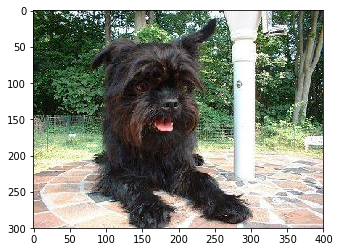

In [19]:
from matplotlib import pyplot as plt
import os
%matplotlib inline 

img_path = os.path.join('data','dogImages','train','001.Affenpinscher','Affenpinscher_00001.jpg')
image = read_image(img_path)
dog_breed = predict_breed_transfer(image)
print(f'Class: {dog_breed}')
plt.imshow(image)
plt.show()

---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `human_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [38]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.

from matplotlib import pyplot as plt
import os
%matplotlib inline 

def _get_image_title(is_dog, is_human, breed, img_name):
    who = 'dog' if is_dog else 'human' if is_human else 'alien'
    title = f'Welcome {who}.'
    if breed:
        title += f' You look like a {breed}.'
    if is_dog:
        title += f' Expected: {img_name}'
    return title

def run_app(img_path):
    is_dog = vgg_dog_detector(img_path)
    is_human = face_detector(img_path)
    image = read_image(img_path)

    
    breed = None
    if is_dog or is_human:
        breed = predict_breed_transfer(image)
    
    expected, _ = os.path.splitext(os.path.basename(img_path))
    title = _get_image_title(is_dog, is_human, breed, expected.replace('_', ' ')[:-6])
    
    plt.imshow(image)
    plt.title(title)
    plt.show()


---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ 

The output is approximately as I expected. The points of improvement could be:
* Invent more data. Since there are numerous dog breed classes that share some similarities and make the network confused having more training data seems worthwile. Thus it would be worth exploring other transformations, e.g. flip upside-down, more rotations, translations, and possibly non-linear colour transformations to simulate various lighting conditions.
* Use decayed learning rate. For instance, Inception v3 network was trained (as reported in the paper) with learning rate 0.045 with exponential decay. From the observation of the learning process in Step 3 (network from scratch) keeping high learning rate worked only at the beginning of training, whereas with a small one the network started learning only after very many epochs. 
* Try different optimizers. I chose SGD because in the small set of tests I executed it gave better results, but there is evidence that adaptive optimizers such as Adam or RMSprop work better. It might be worth to investigate other parameters these optimizers offer, e.g momentum.

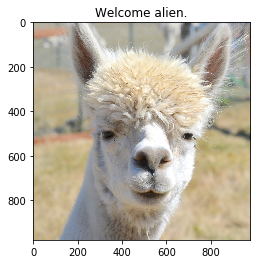

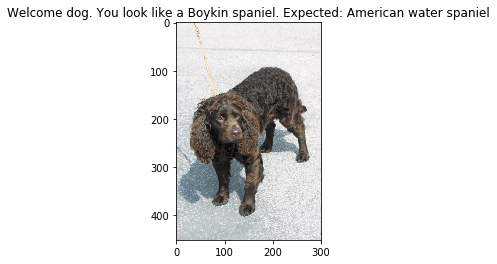

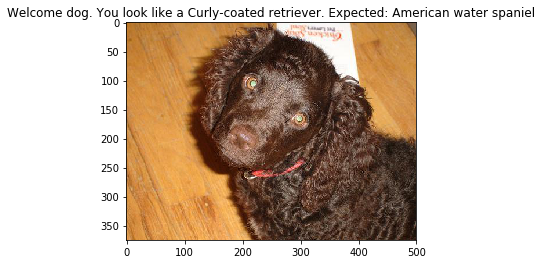

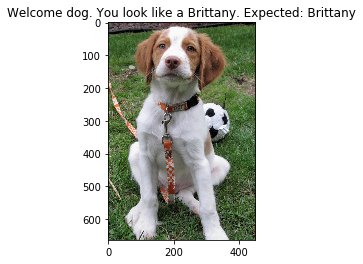

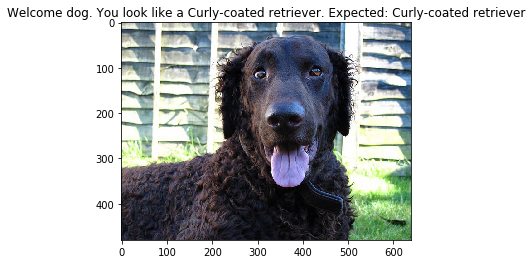

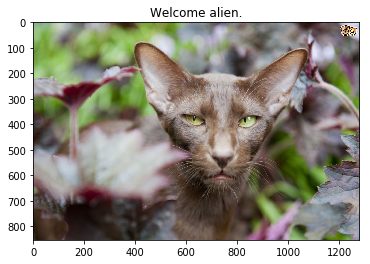

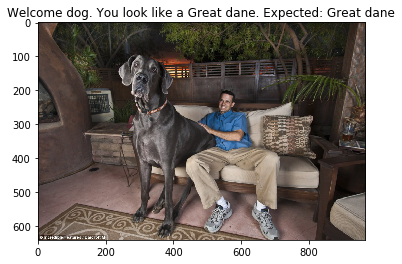

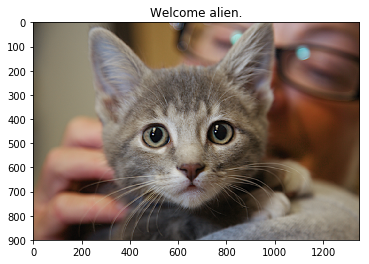

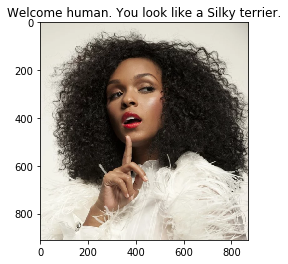

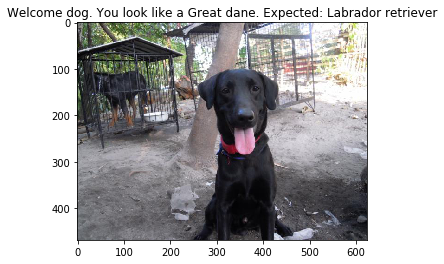

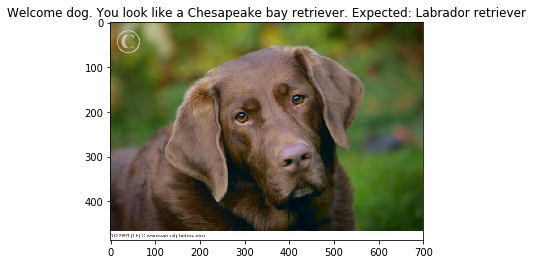

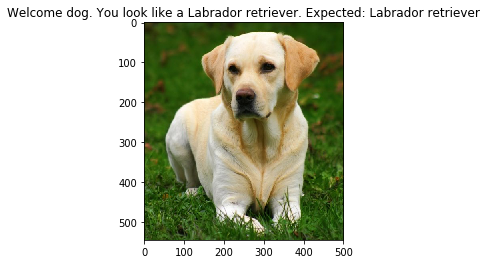

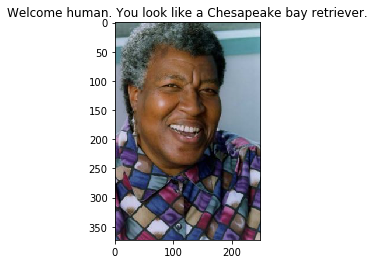

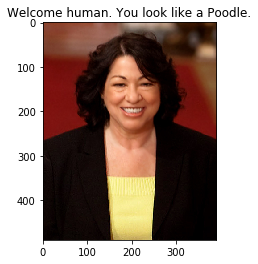

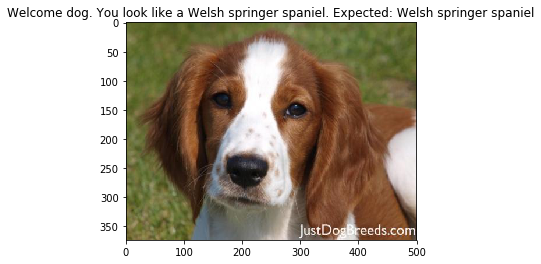

In [41]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.

## suggested code, below
import os

app_images = 'app_images'

for file in os.listdir(app_images):
    img_path = os.path.join(app_images, file)
    run_app(img_path)